Comparison wip

https://colab.research.google.com/drive/1sfevYBDagoC2q93tcXuWfvUn1XmlOLJL?usp=sharing

#IMPORTS

In [ ]:
from datetime import datetime

In [ ]:
from google.colab import drive
## uncomment and rerun for yourselves
path = '/content/drive'
drive.mount(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14, 8)})

In [ ]:
!pip install typing ## added this, sometimes typing.Literal is required for import!!

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima 

Load helper functions and constants file

In [ ]:
#helper Functions

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/helper_functions.ipynb'

In [ ]:
# constants

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/Constants.ipynb'

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import statistics

Get SBI Data


In [ ]:
# by default will fetch from oct 1st 2016 to oct 1st 2021 
sbi_data = fetch_data_from_yfinance(sbi_ticker)

In [ ]:
# by default will fetch from oct 1st 2016 to oct 1st 2021 
tcs_data = fetch_data_from_yfinance(tcs_ticker)

auto arima
Finding p, q, d ( Non Seasonal) and P, Q , D (Seasonal ) parameters

In [ ]:
df_years_4 = pd.DataFrame(sbi_data.loc['2015-01':'2019-01', 'Close'],columns=['Close'])

In [ ]:
df_years_4 = df_years_4.asfreq('b')

In [ ]:
df_years_4.isna().sum() #whatttt

Close    31
dtype: int64

In [ ]:
df_years_4 = df_years_4.fillna(0)

In [ ]:
def grid_search_over_season_period(series):
  m_values = [1,2,3,5,6]

  aic_values_list = []

  opti_model = None

  opti_aic = 0

  opti_m_value = 0

  for m in m_values:

    auto_arima_model = auto_arima(series,
                                seasonal=True,
                                n_jobs=4,m=m
                                )
    aic = auto_arima_model.aic()

    if aic > opti_aic:
      opti_aic = aic
      opti_model = auto_arima_model
      opti_m_value = m

    aic_values_list.append(aic)

  return opti_model,m



Suspecting non integrated seasonality , where taking the seasonal diff , over diff the data -> look into this @asmita if possible

##one step forecastng yet again. Tis is simple really

In [ ]:
def get_one_step_pred_from_sarima(series,train_data,test_data,window_size=10,p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=0,
                                  p_seasonal=0,q_seasonal=0,d_seasonal=0,season_period=0):

  sarima_model = SARIMAX(series, 
                           order=(p_non_seasonal,d_non_seasonal,q_non_seasonal), 
                           seasonal_order=(p_seasonal,d_seasonal,q_seasonal,season_period)) #fit on the entire series and only forecast the test errors 
                           #and why does this make sense? well , you are already training on the test set , so obviously,the tth test point takes t-1th real data into consideration. 
  
  start=len(train_data) #starting index of the time series from which to forecast 

  end=len(train_data)+len(test_data)-1 #end index of the time series from which to forecast

  #hence will forecast from where the train data ends to where the test data begins
  sarima_modelresults = sarima_model.fit(disp=False)


  predictions = sarima_modelresults.get_prediction(start=start, end=end, dynamic=False, typ='levels')

  ci = predictions.conf_int()

  predictions = predictions.predicted_mean
  return predictions,ci


  




## 4 year data

###Sbi data

In [ ]:
sbi_4_year = df_years_4['Close']

In [ ]:
#opti_model_param,opti_m = grid_search_over_season_period(sbi_4_year)

In [ ]:
#opti_model_param.summary()

Splitting into Train and Test data

In [ ]:
train_data_sbi_4 = pd.DataFrame(sbi_4_year.loc['2015-01':'2018-01'])

test_data_sbi_4 = pd.DataFrame(sbi_4_year.loc['2018-02':'2019-01'])


train_data_sbi_4 = train_data_sbi_4.asfreq('b')
test_data_sbi_4= test_data_sbi_4.asfreq('b')

In [ ]:
#SARIMAX(0, 0, 1)x(1, 0, [], 2

In [ ]:
prediction_series_sbi_4,ci_sbi_4 = get_one_step_pred_from_sarima(sbi_4_year,train_data_sbi_4,test_data_sbi_4,
                                                                 p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=1,
                                                                 p_seasonal=1,q_seasonal=0,d_seasonal=0,season_period=2
                                                                 )

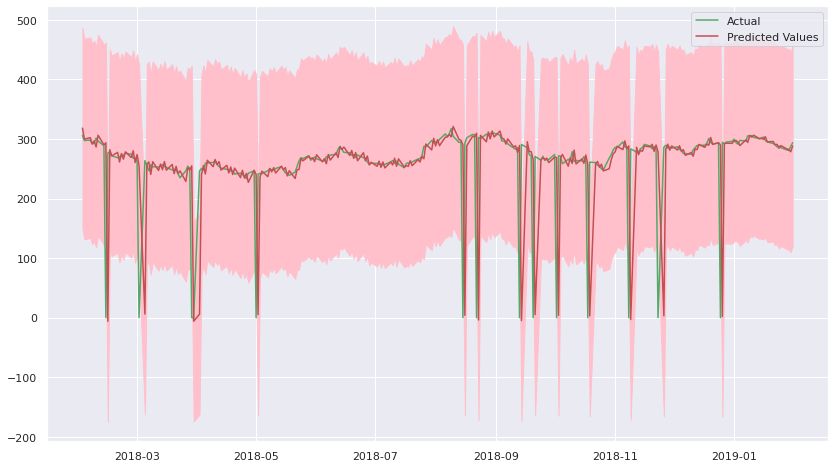

In [ ]:
# Plot predictions against known values


title = 'Comparison of predictions of SARIMA of SBI 4 years'

plt.plot(test_data_sbi_4, label = "Actual",color='g')
plt.plot(prediction_series_sbi_4, label = " Predicted",color='r')
plt.fill_between(ci_sbi_4.index, ci_sbi_4['lower Close'],ci_sbi_4['upper Close'], color='pink', label='Confidence Interval')

plt.legend(['Actual','Predicted Values'])

plt.show()


###TCS Data

In [ ]:
df_years_4_tcs = pd.DataFrame(tcs_data.loc['2015-01':'2019-01', 'Close'],columns=['Close'])

In [ ]:
df_years_4_tcs = df_years_4_tcs.asfreq('b')

In [ ]:
df_years_4_tcs = df_years_4_tcs.fillna(0)

In [ ]:
tcs_4_year = df_years_4_tcs['Close']

In [ ]:
#opti_model_param,opti_m = grid_search_over_season_period(tcs_4_year)

In [ ]:
#opti_model_param.summary()

In [ ]:
#opti_m

splitting into train test

In [ ]:
train_data_tcs_4 = pd.DataFrame(tcs_4_year.loc['2015-01':'2018-01'])

test_data_tcs_4 = pd.DataFrame(tcs_4_year.loc['2018-02':'2019-01'])


train_data_tcs_4 = train_data_tcs_4.asfreq('b')
test_data_tcs_4= test_data_tcs_4.asfreq('b')

In [ ]:
#SARIMAX(0, 1, 1)

In [ ]:
prediction_series_tcs_4,ci_tcs_4 = get_one_step_pred_from_sarima(tcs_4_year,train_data_tcs_4,test_data_tcs_4,
                                                                 p_non_seasonal=0,d_non_seasonal=1,q_non_seasonal=1)

In [ ]:
prediction_series_tcs_4

Date
2018-02-01    1340.994675
2018-02-02    1352.362765
2018-02-05    1363.539490
2018-02-06    1372.903652
2018-02-07    1379.163739
                 ...     
2019-01-25    1854.618182
2019-01-28    1857.913599
2019-01-29    1862.747857
2019-01-30    1868.723166
2019-01-31    1874.333724
Freq: B, Name: predicted_mean, Length: 261, dtype: float64

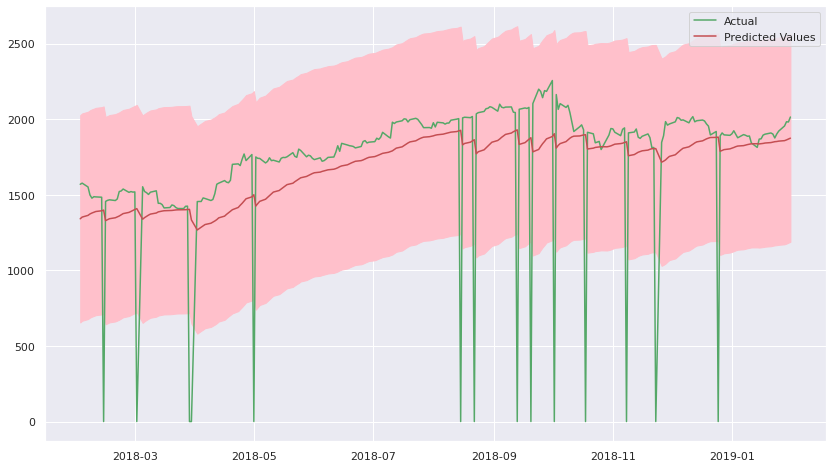

In [ ]:
# Plot predictions against known values


title = 'Comparison of predictions of SARIMA of TCS 4 years'

plt.plot(test_data_tcs_4, label = "Actual",color='g')
plt.plot(prediction_series_tcs_4, label = " Predicted",color='r')
plt.fill_between(ci_tcs_4.index, ci_tcs_4['lower Close'],ci_tcs_4['upper Close'], color='pink', label='Confidence Interval')

plt.legend(['Actual','Predicted Values'])

plt.show()

###ONE YEAR!!!!

SBI

In [ ]:
sbi_1 = pd.DataFrame(sbi_data.loc['2018-01':'2019-12', 'Close'])

In [ ]:
sbi_1 = sbi_1.asfreq('b')

In [ ]:
sbi_1 = sbi_1.fillna(0)

In [ ]:
train_data_sbi_1 = sbi_1.loc['2018-01':'2018-10']

test_data_sbi_1 = sbi_1.loc['2018-11':'2018-12']

In [ ]:
prediction_series_sbi_1,ci_sbi_1 = get_one_step_pred_from_sarima(sbi_1,train_data_sbi_1,test_data_sbi_1,
                                                                 p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=1,
                                                                 p_seasonal=1,q_seasonal=0,d_seasonal=0,season_period=2
                                                                 )

TCS

In [ ]:
tcs_1 = pd.DataFrame(tcs_data.loc['2018-01':'2019-12', 'Close'])

In [ ]:
tcs_1 = tcs_1.asfreq('b')

In [ ]:
tcs_1 = tcs_1.fillna(0)

In [ ]:
train_data_tcs_1 = tcs_1.loc['2018-01':'2018-10']

test_data_tcs_1 = tcs_1.loc['2018-11':'2018-12']

In [ ]:
prediction_series_tcs_1,ci_tcs_1 = get_one_step_pred_from_sarima(tcs_1,train_data_tcs_1,test_data_tcs_1,
                                                                 p_non_seasonal=0,d_non_seasonal=1,q_non_seasonal=1)

###Cross Validation in SARIMA

In [ ]:
import statistics

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
series = df_years_4['Close']

In [ ]:
dict_of_cross_valid_error = {}

In [ ]:
def cross_validate_sarima(series,n_split=5,p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=0,p_seasonal=0,q_seasonal=0,d_seasonal=0,season_period=0):

  mae_each_split = []

  tscv = TimeSeriesSplit(gap =0, n_splits=n_split)

  generator_of_split = tscv.split(series)

  for train_index, test_index in generator_of_split:
    train_data = series[train_index]
    test_data = series[test_index]

    predictions,ci = get_one_step_pred_from_sarima(series,train_data,test_data,
                                                   p_non_seasonal=p_non_seasonal,d_non_seasonal=d_non_seasonal,q_non_seasonal=q_non_seasonal,
                                                   p_seasonal=p_seasonal,q_seasonal=q_seasonal,d_seasonal=d_seasonal,season_period=season_period)

    residuals = predictions.subtract(pd.Series(test_data)).abs()

    mae_each_split.append(statistics.mean(residuals.values))

  return mae_each_split






4 year cross validate

In [ ]:
##SARIMAX(0, 0, 1)x(1, 0, [], 2
mae_each_split_across_5_split = cross_validate_sarima(df_years_4['Close'],p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=1,
                                                              p_seasonal=1,d_seasonal=0,q_seasonal=0,season_period=2

                                                              )

In [ ]:
sbi_4_mae_5_split = statistics.mean(mae_each_split_across_5_split)

In [ ]:
sbi_4_mae_5_split

32.2301150972803

In [ ]:
##SARIMAX(0, 1, 1)

mae_each_split_across_5_split_tcs = cross_validate_sarima(df_years_4_tcs['Close'],p_non_seasonal=0,d_non_seasonal=1,q_non_seasonal=1)

tcs_4_mae_5_split = statistics.mean(mae_each_split_across_5_split_tcs)

one year cross validate

In [ ]:
mae_each_split_across_5_split = cross_validate_sarima(sbi_1['Close'],p_non_seasonal=0,d_non_seasonal=0,q_non_seasonal=1,
                                                              p_seasonal=1,d_seasonal=0,q_seasonal=0,season_period=2

                                                              )

In [ ]:
sbi_1_mae_5_split = statistics.mean(mae_each_split_across_5_split)

In [ ]:
sbi_1_mae_5_split

44.0222634634106

In [ ]:
mae_each_split_across_5_split_tcs = cross_validate_sarima(tcs_1['Close'],p_non_seasonal=0,d_non_seasonal=1,q_non_seasonal=1)

tcs_1_mae_5_split = statistics.mean(mae_each_split_across_5_split_tcs)

In [ ]:
tcs_1_mae_5_split

279.5671365767372